In [1]:
# DiabetesData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('Datasets/diabetes.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [ ]:
print(df.describe())

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

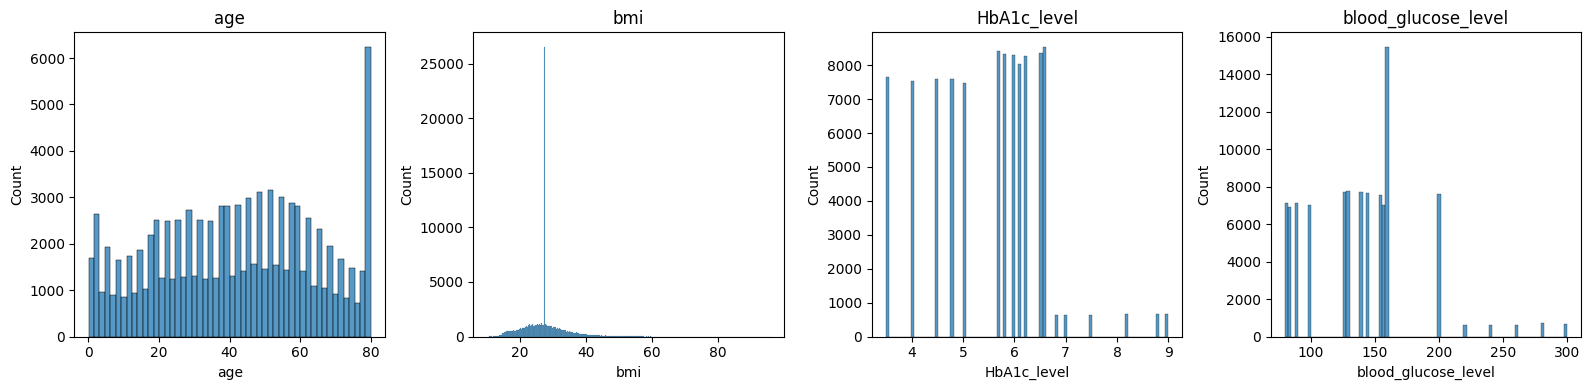

In [ ]:
import math
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
ncols=5
nrows=math.ceil(len(num_cols)/ncols)
fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,4*nrows))
axes=axes.flatten()
for i,col in enumerate(num_cols):
    sns.histplot(df[col],ax=axes[i])
    axes[i].set_title(col)
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

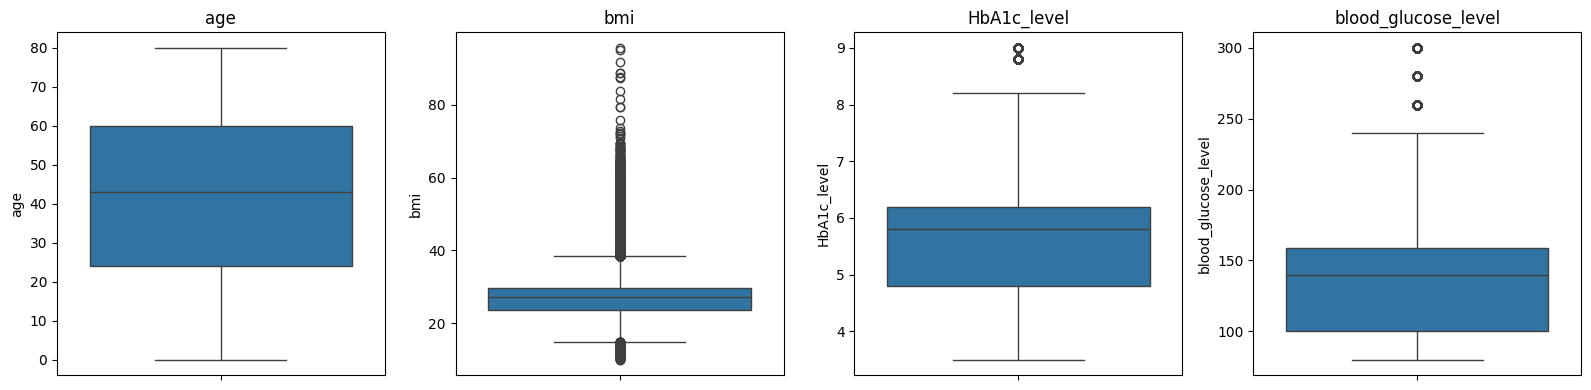

In [ ]:
ncols=5
nrows=math.ceil(len(num_cols)/ncols)
fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,4*nrows))
axes=axes.flatten()
for i,col in enumerate(num_cols):
    sns.boxplot(df[col],ax=axes[i])
    axes[i].set_title(col)
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

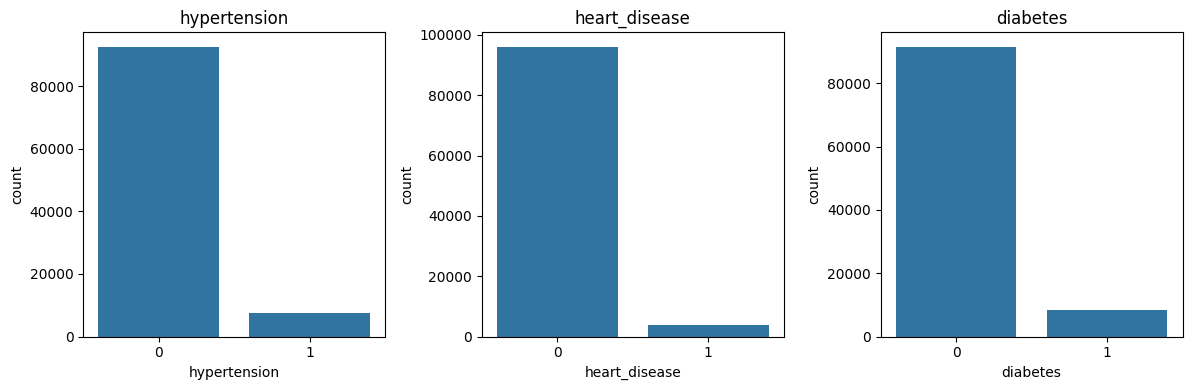

In [ ]:
cat_cols = ['hypertension', 'heart_disease', 'diabetes']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,4))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Heavy imbalanced


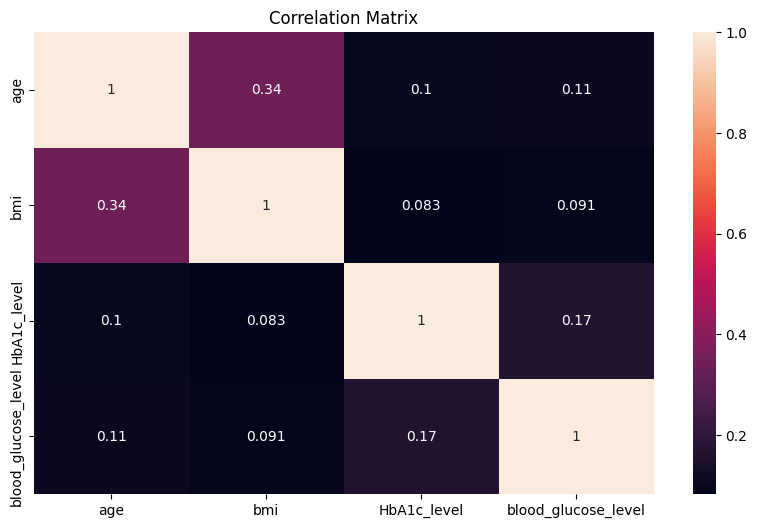

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()